## Definition of Simple Harmonic Motion (SHM)
In simple harmonic motion, the acceleration of the system, and therefore the net force is **proportional to the displacement** and acts in the **opposite direction** of the displacement.
A good example of SHM is an object with mass **m** attached to a spring on a frictionless surface, as shown in Figure below.

![alt text](https://yaser-rahmati.gitbook.io/~/files/v0/b/gitbook-28427.appspot.com/o/assets%2F-M2g31CUvdCruJm660Ot%2F-Mecvjq2BDvJ3dkFdzv_%2F-MecwHn0HDtqUeE_bhSQ%2F721.jpg?alt=media&token=8e637c37-d08e-4c67-a954-3b1f73a408d3 "SHM")

The object oscillates around the equilibrium position, and the net force on the object is equal to the force provided by the spring. This force obeys **Hooke’s law**:

$$ F_{s}=-kx $$

* If the net force can be described by **Hooke’s law** and there is **no damping** (slowing down due to friction or other nonconservative forces), then a simple harmonic oscillator oscillates with equal displacement on either side of the equilibrium position.
* The maximum displacement from equilibrium is called the **amplitude (A)**.

## Equations of SHM
Consider a block attached to a spring on a frictionless table (Figure below). The equilibrium position (the position where the spring is neither stretched nor compressed) is marked as **x=0**. At the equilibrium position, the net force is **zero**.

![alt text](https://yaser-rahmati.gitbook.io/~/files/v0/b/gitbook-28427.appspot.com/o/assets%2F-M2g31CUvdCruJm660Ot%2F-MecxTS5_7cvwXWvg_ML%2F-MecxcKaVwyqG_uANx2V%2F722.jpg?alt=media&token=7c87b593-6886-4d7e-ba38-8ef992d9eab5 "Equations of SHM")

By means of **Newton's 2nd law** and **Hooke's law** for a mass on a spring, we have:

$$ F_{net}=m\frac{d^2x}{dt^2}=-kx $$

where:
* **m** is the inertial mass of the oscillating body, 
* **x** is its displacement from the equilibrium (or mean) position, 
* **k** is a constant (the spring constant for a mass on a spring). 

Therefore,
$$ \frac{d^2x}{dt^2}=-\frac{k}{m}x $$

Solving the differential equation above produces a solution that is a **sinusoidal function**:

$$ x(t)=c_{1}cos(\omega t)+c_{2}sic(\omega t) $$

where:

$$ \omega =\sqrt{\frac{k}{m}} $$

The meaning of the constants **C₁** and **C₂** can be easily found: 

* Setting **t=0** on the equation above we see that **x(0) = C₁**, so that **C₁** is the initial position of the particle,

$$ C_{1}=x(0) $$

* Taking the **derivative of that equation** and evaluating at **zero** we get that **dx/dt (t=0)=ωC₂**, so that **C₂** is the initial speed of the particle divided by the angular frequency:

$$ c_{2}=\frac{v_{0}}{\omega } $$

Thus we can write:

$$ x(t)=x_{0}cos(\sqrt{\frac{k}{m}}t)+\frac{v_{0}}{\sqrt{\frac{k}{m}}}sin(\sqrt{\frac{k}{m}}t) $$

This equation can also be written in the form:

$$ x(t)=Acos(\omega t-\phi ) $$

where:

$$ A=\sqrt{c_{1}^{2}+c_{2}^{2}} $$

and

$$ tan\phi =\frac{c_{1}}{c_{2}} $$

Using the techniques of calculus, the **velocity** and **acceleration** as a function of time can be found:

## Speed

$$ v(t)=\frac{dx}{dt}=-A\omega cos(\omega t-\phi ) $$

## Acceleration

$$ a(t)=\frac{dv}{dt}=-A\omega^2 sin(\omega t-\phi ) $$

## Source code

Period: 2.8099258924162904 seconds
Frequency: 0.3558812717085885 Hz
k:  100 N/m


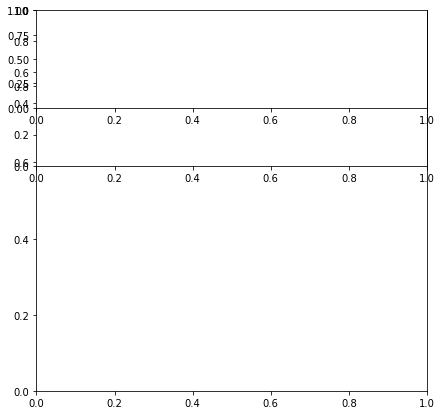

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(2,1,1)
ax3 = fig.add_subplot(3,1,1)
fig.subplots_adjust(hspace=.45)

# Spring data
k = 100
m = 20
w = np.sqrt(k/m)
phi = 2
A = 2

period = 2*np.pi/w
frequency = 1/period

print("Period:",period,"seconds",sep=" ")
print("Frequency:",frequency,"Hz",sep=" ")
print("k: ",k,"N/m",sep=" ")

def fun(t):
    global w,phi,A
    return A*np.sin(w*t+phi)

def vel(t):
    global w,phi,A
    return A*w*np.cos(w*t+phi)

def acceleration(t):
    global w,phi,A
    return -A*w**2*np.sin(w*t+phi)


def position(x):
    x1 = x-1
    x2 = x+1
    y1 = 1 
    y2 = -1

    p1 = [x1,y2]
    p2 = [x2,y2]
    p3 = [x2,y1]
    p4 = [x1,y1]
    return [p1,p2,p3,p4]

counter = 0
xt = [0]
yt = [0]
vy = [0]
acy = [0]

def animate(i):
    global counter, xt,yt,A,vy,acy
    ax3.clear()

    plt.subplot(311)
    # configure  X axes
    plt.xlim(-3.5,3.5)

    # configure  Y axes
    plt.ylim(-2,2)

    # labels
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Motion of an ideal spring")
    
    p1 = [position(fun(counter))[0][0],position(fun(counter))[0][1]]
    p2 = [position(fun(counter))[1][0],position(fun(counter))[1][1]]
    p3 = [position(fun(counter))[2][0],position(fun(counter))[2][1]]
    p4 = [position(fun(counter))[3][0],position(fun(counter))[3][1]]

    x = [p1[0],p2[0],p3[0],p4[0],p1[0]]
    y = [p1[1],p2[1],p3[1],p4[1],p1[1]]
    linex = [-4,p1[0]]
    liney = [0,0]
    
    plt.plot(x,y,lw=5,color="blue")
    plt.plot(linex,liney,color="red",ls=":",lw=5)

    plt.subplot(312)
    xt.append(counter)
    vy.append(vel(counter))
    plt.title("Velocity")
    plt.xlim(0,15)
    plt.ylim(-A*w-0.5,A*w+0.5)
    plt.plot(xt,vy,lw=1,color="green")
    plt.plot([0,15],[0,0],lw=0.5,color="black")

    plt.subplot(313)
    acy.append(acceleration(counter))
    plt.title("Acceleration")
    plt.xlim(0,15)
    plt.ylim(-A*w**2-0.5,A*w**2+0.5)
    plt.plot(xt,acy,lw=1,color="green")
    plt.plot([0,15],[0,0],lw=0.5,color="black")
    
    counter += 0.1
    

ani = animation.FuncAnimation(fig,animate,interval=2)
plt.show()